In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Mall_Customers.csv')

In [14]:
age = data.iloc[:,2].values
score = data.iloc[:,-1].values
income = data.iloc[:,3].values

In [7]:
# not required!!
age = np.array(age)
score = np.array(score)

In [10]:
score.shape(0)

TypeError: 'tuple' object is not callable

In [11]:
score[0].shape

()

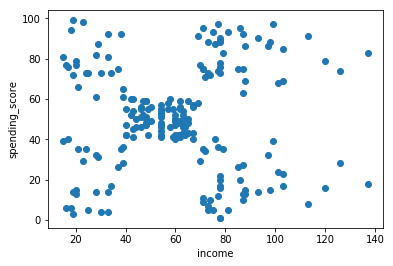

In [15]:
plt.scatter(income,score)
plt.xlabel('income')
plt.ylabel('spending_score')
plt.show()

In [13]:
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [21]:
# preprocess data and removing unrelevant features
X = data.iloc[:,1:].values

In [23]:
type(X)

numpy.ndarray

In [24]:
X.shape

(200, 4)

In [25]:
X[0].shape

(4,)

In [26]:
X.shape[0]

200

In [27]:
X.shape[1]

4

In [29]:
n = X.shape[0]
for i in range (0,n):
    if(X[i][0]=='Male'):
        X[i][0]=1
    else:
        X[i][0]=0

In [31]:
X #now data is ready for clustering

array([[1, 19, 15, 39],
       [1, 21, 15, 81],
       [0, 20, 16, 6],
       [0, 23, 16, 77],
       [0, 31, 17, 40],
       [0, 22, 17, 76],
       [0, 35, 18, 6],
       [0, 23, 18, 94],
       [1, 64, 19, 3],
       [0, 30, 19, 72],
       [1, 67, 19, 14],
       [0, 35, 19, 99],
       [0, 58, 20, 15],
       [0, 24, 20, 77],
       [1, 37, 20, 13],
       [1, 22, 20, 79],
       [0, 35, 21, 35],
       [1, 20, 21, 66],
       [1, 52, 23, 29],
       [0, 35, 23, 98],
       [1, 35, 24, 35],
       [1, 25, 24, 73],
       [0, 46, 25, 5],
       [1, 31, 25, 73],
       [0, 54, 28, 14],
       [1, 29, 28, 82],
       [0, 45, 28, 32],
       [1, 35, 28, 61],
       [0, 40, 29, 31],
       [0, 23, 29, 87],
       [1, 60, 30, 4],
       [0, 21, 30, 73],
       [1, 53, 33, 4],
       [1, 18, 33, 92],
       [0, 49, 33, 14],
       [0, 21, 33, 81],
       [0, 42, 34, 17],
       [0, 30, 34, 73],
       [0, 36, 37, 26],
       [0, 20, 37, 75],
       [0, 65, 38, 35],
       [1, 24, 38, 92]

In [ ]:
#for clustering choose k initial cluster centres(from data) and map every new data point to one
#of the cluster and update centroid of chosen cluster

def cluster(data,k,centroids):
    